In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc

In [2]:
# Percorso del file CSV
file_path = "datasets/staticon.csv"

# Carica il dataset con il separatore corretto
df = pd.read_csv(file_path, sep=';')

# Stampa i Paesi riconosciuti da Plotly
# countries_plotly = px.data.gapminder()['country'].unique()
# print("Paesi riconosciuti da Plotly:")
# print("Numero di paesi riconosciuti da Plotly:", len(countries_plotly))
# print(countries_plotly)

# Stampa i Paesi riconosciuti dal dataset
# print("Paesi presenti nel dataset:")
# print("Numero di paesi presenti nel dataset:", len(df['Stati parti'].unique()))
# print(df['Stati parti'].unique())

country_mapping = {
    'Afganistan': 'Afghanistan',
    'Albania': 'Albania',
    'Algeria': 'Algeria',
    'Andorra': 'Andorra',
    'Angola': 'Angola',
    'Antigua e Barbuda': 'Antigua and Barbuda',
    'Argentina': 'Argentina',
    'Armenia': 'Armenia',
    'Australia': 'Australia',
    'Austria': 'Austria',
    'Azerbaigian': 'Azerbaijan',
    'Bahrein': 'Bahrain',
    'Bangladesh': 'Bangladesh',
    'Barbados': 'Barbados',
    'Bielorussia': 'Belarus',
    'Belgio': 'Belgium',
    'Belize': 'Belize',
    'Benin': 'Benin',
    'Bolivia (Stato Plurinazionale di)': 'Bolivia',
    'Bosnia ed Erzegovina': 'Bosnia and Herzegovina',
    'Botswana': 'Botswana',
    'Brasile': 'Brazil',
    'Bulgaria': 'Bulgaria',
    'Burkina Faso': 'Burkina Faso',
    'Capo Verde': 'Cape Verde',
    'Cambogia': 'Cambodia',
    'Camerun': 'Cameroon',
    'Canada': 'Canada',
    'Repubblica Centrafricana': 'Central African Republic',
    'Chad': 'Chad',
    'Chile': 'Chile',
    'Cina': 'China',
    'Colombia': 'Colombia',
    'Congo': 'Congo, Rep.',
    'Costa Rica': 'Costa Rica',
    "Costa d'Avorio": "Cote d'Ivoire",
    'Croazia': 'Croatia',
    'Cuba': 'Cuba',
    'Cipro': 'Cyprus',
    'Repubblica Ceca': 'Czech Republic',
    'Repubblica Popolare Democratica di Corea': 'North Korea',
    'Repubblica Democratica del Congo': 'Congo, Dem. Rep.',
    'Danimarca': 'Denmark',
    'La dominica': 'Dominica',
    'Repubblica Dominicana': 'Dominican Republic',
    'Ecuador': 'Ecuador',
    'Egitto': 'Egypt',
    'El Salvador': 'El Salvador',
    'Eritrea': 'Eritrea',
    'Estonia': 'Estonia',
    'Etiopia': 'Ethiopia',
    'Figi': 'Fiji',
    'Finlandia': 'Finland',
    'Francia': 'France',
    'Gabon': 'Gabon',
    'Gambia': 'Gambia',
    'Georgia': 'Georgia',
    'Germania': 'Germany',
    'Ghana': 'Ghana',
    'Grecia': 'Greece',
    'Guatemala': 'Guatemala',
    'Guinea': 'Guinea',
    'Haiti': 'Haiti',
    'Santa Sede': 'Holy See',
    'Honduras': 'Honduras',
    'Ungheria': 'Hungary',
    'Islanda': 'Iceland',
    'India': 'India',
    'Indonesia': 'Indonesia',
    "Iran (Repubblica Islamica dell')": 'Iran',
    'Iraq': 'Iraq',
    'Irlanda': 'Ireland',
    'Israele': 'Israel',
    'Italia': 'Italy',
    'Giamaica': 'Jamaica',
    'Giappone': 'Japan',
    'Giordania': 'Jordan',
    'Kazakistan': 'Kazakhstan',
    'Kenia': 'Kenya',
    'Kiribati': 'Kiribati',
    'Kirghizistan': 'Kyrgyzstan',
    'Repubblica Democratica Popolare del Laos': 'Laos',
    'Lettonia': 'Latvia',
    'Libano': 'Lebanon',
    'Lesoto': 'Lesotho',
    'Libia': 'Libya',
    'Lituania': 'Lithuania',
    'Lussemburgo': 'Luxembourg',
    'Madagascar': 'Madagascar',
    'Malawi': 'Malawi',
    'Malaysia': 'Malaysia',
    'Mali': 'Mali',
    'Malta': 'Malta',
    'Isole Marshall': 'Marshall Islands',
    'Mauritania': 'Mauritania',
    'Maurizio': 'Mauritius',
    'Messico': 'Mexico',
    'Micronesia (Stati Federati di)': 'Micronesia',
    'Mongolia': 'Mongolia',
    'Montenegro': 'Montenegro',
    'Marocco': 'Morocco',
    'Mozambico': 'Mozambique',
    'Birmania': 'Myanmar',
    'La Namibia': 'Namibia',
    'Nepal': 'Nepal',
    'Paesi Bassi (Regno dei)': 'Netherlands',
    'Nuova Zelanda': 'New Zealand',
    'Nicaragua': 'Nicaragua',
    'Niger': 'Niger',
    'Nigeria': 'Nigeria',
    'Macedonia del Nord': 'North Macedonia',
    'Norvegia': 'Norway',
    'Oman': 'Oman',
    'Pakistan': 'Pakistan',
    'Palau': 'Palau',
    'Panama': 'Panama',
    'Papua Nuova Guinea': 'Papua New Guinea',
    'Il Paraguay': 'Paraguay',
    'Perù': 'Peru',
    'Filippine': 'Philippines',
    'Polonia': 'Poland',
    'Portogallo': 'Portugal',
    'Qatar': 'Qatar',
    'Repubblica di Corea': 'South Korea',
    'Repubblica di Moldavia': 'Moldova',
    'Romania': 'Romania',
    'Federazione Russa': 'Russia',
    'Ruanda': 'Rwanda',
    'Saint Kitts e Nevis': 'Saint Kitts and Nevis',
    'Santa Lucia': 'Saint Lucia',
    'San Marino': 'San Marino',
    'Arabia Saudita': 'Saudi Arabia',
    'Senegal': 'Senegal',
    'Serbia': 'Serbia',
    'Le Seychelles': 'Seychelles',
    'Singapore': 'Singapore',
    'Slovacchia': 'Slovakia',
    'Slovenia': 'Slovenia',
    'Isole Salomone': 'Solomon Islands',
    'Sudafrica': 'South Africa',
    'Spagna': 'Spain',
    'Sri Lanka': 'Sri Lanka',
    'Stato di Palestina': 'Palestine',
    'Sudan': 'Sudan',
    'Suriname': 'Suriname',
    'Svezia': 'Sweden',
    'Svizzera': 'Switzerland',
    'Repubblica araba siriana': 'Syria',
    'Tagikistan': 'Tajikistan',
    'Thailandia': 'Thailand',
    'Togo': 'Togo',
    'Tunisia': 'Tunisia',
    'Turchia': 'Turkey',
    'Turkmenistan': 'Turkmenistan',
    'Uganda': 'Uganda',
    'Ucraina': 'Ukraine',
    'Emirati Arabi Uniti': 'United Arab Emirates',
    'Regno Unito di Gran Bretagna e Irlanda del Nord': 'United Kingdom',
    'Repubblica Unita di Tanzania': 'Tanzania',
    "Stati Uniti d'America": 'United States',
    'Uruguay': 'Uruguay',
    'Uzbekistan': 'Uzbekistan',
    'Vanuatu': 'Vanuatu',
    'Venezuela (Repubblica Bolivariana del)': 'Venezuela',
    'Vietnam': 'Vietnam',
    'Yemen': 'Yemen',
    'Zambia': 'Zambia',
    'Zimbabwe': 'Zimbabwe'
}

# Verifica se ci sono Paesi nel dataset senza corrispondenza
# missing_countries = df[~df['Stati parti'].isin(country_mapping.keys())]['Stati parti'].unique()
# print("Paesi non mappati:", missing_countries)

df['Stati parti'] = df['Stati parti'].map(country_mapping)
# Stampa i nomi delle colonne per conferma
# print("Colonne disponibili nel dataset:", df.columns)

# Usa la colonna 'Stati parti' per contare i siti UNESCO per Paese
# Se la colonna 'Proprietà iscritte' è il numero di siti, somma i valori per ogni Paese
sites_by_country = df.groupby('Stati parti')['Proprietà iscritte'].sum().reset_index()

# Rinomina le colonne per chiarezza
sites_by_country.columns = ['Country', 'SiteCount']

# Creazione della mappa coropletica
fig_map = px.choropleth(
    sites_by_country,
    locations="Country",  # Nome della colonna per i Paesi
    locationmode="country names",  # Modalità: nomi dei Paesi
    color="SiteCount",  # Valore da visualizzare
    title="Numero di siti UNESCO per Paese",
    color_continuous_scale=px.colors.sequential.Plasma,
    hover_name="Country",  # Mostra il nome del Paese quando si passa sopra
    hover_data=["SiteCount"],  # Mostra anche il conteggio dei siti
)

fig_map.show()

# Creazione del grafico a barre
fig_bar = px.bar(
    sites_by_country.sort_values(by="SiteCount", ascending=False),
    x="Country",
    y="SiteCount",
    title="Numero di siti UNESCO per Paese",
    labels={"SiteCount": "Numero di siti", "Country": "Paese"},
    text="SiteCount",
    color="SiteCount",  # Colorazione in base al numero di siti
    color_continuous_scale=px.colors.sequential.Plasma  # Cambia la scala dei colori
)

# Evidenzia l'Italia in rosso
# fig_bar.update_traces(marker_color=sites_by_country['Country'].apply(
#     lambda x: 'red' if x == 'Italy' else px.colors.sequential.Plasma[0]
# ))

# Aggiungi miglioramenti estetici (rotazione delle etichette e miglioramento del layout)
fig_bar.update_layout(
    xaxis_tickangle=-45,  # Ruota le etichette sull'asse x
    xaxis_title="Paese",
    yaxis_title="Numero di siti",
    title_x=0.5,  # Centra il titolo
    title_y=0.95,  # Aggiusta la posizione del titolo
    title_font_size=18,
    showlegend=False  # Nascondi la legenda
)

fig_bar.show()

In [3]:
# Carica i dati dal file CSV come stringhe
columns = ['Country', 'Latitude', 'Longitude', '1996', '1998', '2000', '2002', '2004', 
           '2006', '2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022']
df = pd.read_csv('datasets/normalized_completo.csv', delimiter=';', header=None, dtype=str)
df.columns = columns

# Converti Latitude e Longitude in float, gestendo eventuali "?"
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Funzione per convertire i visitatori moltiplicando per 1.000
def convert_visitors(value):
    if pd.isna(value) or value == '..':
        return np.nan
    try:
        value = value.replace('.', '')  # Rimuove il separatore delle migliaia
        return int(value) * 1000  # Moltiplica per 1.000
    except ValueError:
        return np.nan

# Applica la conversione alle colonne degli anni
for year in columns[3:]:
    df[year] = df[year].apply(convert_visitors)

# Range e colori per i visitatori
visitor_bins = [0, 10_000, 500_000, 1_000_000, 5_000_000, 15_000_000, 30_000_000, 50_000_000, float('inf')]
colors = ['#d3d3d3', '#b6d7a8', '#76a5af', '#6fa8dc', '#3d85c6', '#ff9900', '#cc0000', '#660000']
bin_labels = []
for i in range(len(visitor_bins) - 1):
    start = visitor_bins[i]
    end = visitor_bins[i + 1]
    label = f"{start:,} - {int(end-1):,}".replace(',', '.') if end != float('inf') else f"Oltre {start:,}".replace(',', '.')
    bin_labels.append(label)

# Funzione di scaling per le dimensioni dei marker
def scale_marker_size(visitors, min_size=6, max_size=18):
    if pd.isna(visitors) or visitors <= 0:
        return min_size
    max_visitors = df.iloc[:, 3:].max().max()
    scaled_size = min_size + (max_size - min_size) * (np.cbrt(visitors) / np.cbrt(max_visitors))
    return scaled_size

# Funzione per assegnare i bin ai visitatori
def assign_visitor_bin(visitors):
    for i in range(len(visitor_bins) - 1):
        if visitor_bins[i] <= visitors < visitor_bins[i + 1]:
            return i
    return None

# Inizializza le tracce per ogni bin di visitatori
traces = []
for i in range(len(visitor_bins) - 1):
    trace = go.Scattergeo(
        lon=[],
        lat=[],
        text=[],
        marker=dict(
            size=[],
            color=colors[i],
            line_width=0,
            showscale=False
        ),
        hoverinfo='text',
        name=bin_labels[i],
        legendgroup=bin_labels[i],
        showlegend=True
    )
    traces.append(trace)

# Anno iniziale
initial_year = '1996'

# Funzione per aggiornare i dati delle tracce per un anno specifico
def update_traces(year_data):
    data = []
    for i in range(len(visitor_bins) - 1):
        bin_data = year_data[year_data['VisitorBin'] == i]
        data_dict = dict(
            type='scattergeo',
            lon=bin_data['Longitude'].tolist() if not bin_data.empty else [],
            lat=bin_data['Latitude'].tolist() if not bin_data.empty else [],
            text=bin_data['Text'].tolist() if not bin_data.empty else [],
            marker=dict(size=bin_data['Size'].tolist() if not bin_data.empty else [])
        )
        data.append(data_dict)
    return data

# Prepara i dati per l'anno iniziale
year_data = df[df[initial_year].notna()].copy()
year_data['Size'] = year_data[initial_year].apply(scale_marker_size)
year_data['Text'] = year_data.apply(
    lambda row: f"{row['Country']}: {int(row[initial_year]):,} visitatori".replace(',', '.'),
    axis=1
)
year_data['VisitorBin'] = year_data[initial_year].apply(assign_visitor_bin)

# Aggiorna le tracce iniziali con i dati dell'anno iniziale
initial_data = update_traces(year_data)
for i in range(len(traces)):
    traces[i].lon = initial_data[i]['lon']
    traces[i].lat = initial_data[i]['lat']
    traces[i].text = initial_data[i]['text']
    traces[i].marker.size = initial_data[i]['marker']['size']

# Crea i frame per gli altri anni
frames = []
for year in columns[4:]:
    year_data = df[df[year].notna()].copy()
    year_data['Size'] = year_data[year].apply(scale_marker_size)
    year_data['Text'] = year_data.apply(
        lambda row: f"{row['Country']}: {int(row[year]):,} visitatori".replace(',', '.'),
        axis=1
    )
    year_data['VisitorBin'] = year_data[year].apply(assign_visitor_bin)
    frame_data = update_traces(year_data)
    frames.append(go.Frame(data=frame_data, name=year, traces=list(range(len(traces)))))

# Crea la figura
fig = go.Figure(data=traces, frames=frames)

# Imposta layout della mappa
fig.update_layout(
    title_text="Paesi destinazione scelti dai turisti dal 1996 al 2022",
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        showland=True,
        landcolor='white',
        showocean=True,
        # grigio chiarissimo per l'oceano in esadecimale
        oceancolor='#f0f0f0',
        showcountries=True,
        countrycolor='black',
        countrywidth=0.5
    ),
    legend=dict(
        title="Range di visitatori",
        x=1.05,
        y=0.5,
        traceorder="normal",
        itemsizing='constant'
    ),
    updatemenus=[
        {
            'type': 'buttons',
            'showactive': False,
            'x': 1,
            'y': 0,
            'xanchor': 'right',
            'yanchor': 'top',
            'buttons': [
                {
                    'label': 'Play',
                    'method': 'animate',
                    'args': [
                        None,
                        {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True}
                    ]
                },
                {
                    'label': 'Pause',
                    'method': 'animate',
                    'args': [
                        [None],
                        {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}
                    ]
                }
            ]
        }
    ]
)

# Aggiungi lo slider per cambiare anno
fig.update_layout(
    sliders=[{
        'steps': [
            {
                'method': 'animate',
                'label': str(year),
                'args': [
                    [str(year)],
                    {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate'}
                ]
            }
            for year in columns[3:]
        ],
        'transition': {'duration': 500},
        'x': 0.1,
        'xanchor': 'left',
        'y': -0.05,
        'yanchor': 'top'
    }]
)

# Mostra la mappa
fig.show()

![Francia vs Italia](ITAvsFRA_ChartJunk.jpg)

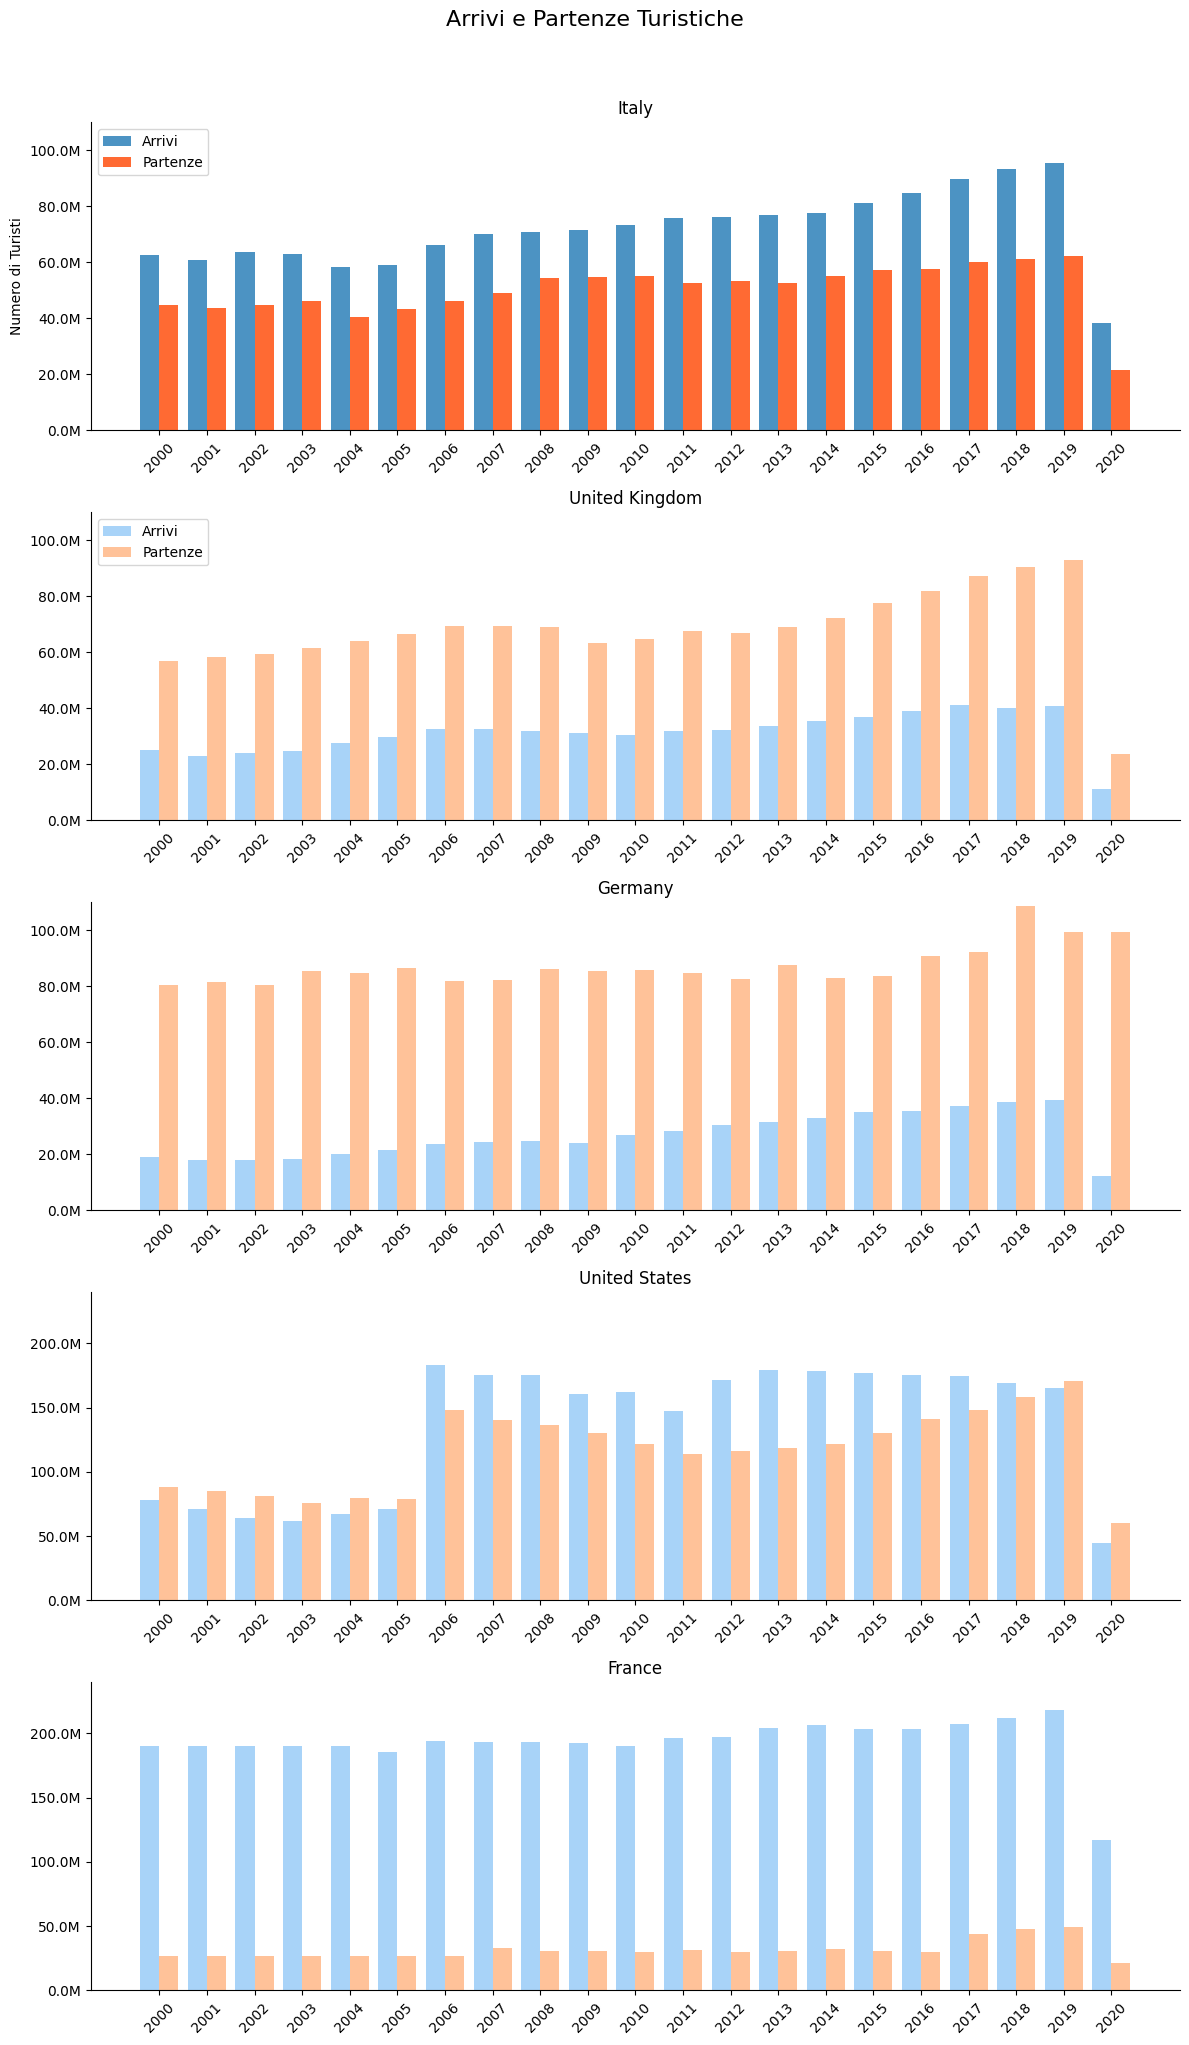

In [4]:
# Carica il dataset
df = pd.read_csv('datasets/ArrivalDepartures.csv')

# Lista dei paesi da visualizzare
countries = ['Italy', 'United Kingdom', 'Germany', 'United States', 'France']

# Crea una lista degli anni dal 2000 al 2020
years = [f"{year} [YR{year}]" for year in range(2000, 2021)]
numeric_years = list(range(2000, 2021))  # Lista degli anni come numeri

# Colori pastello e saturi per l'Italia
colors = {
    'arrivals': {'default': '#93c9f7', 'Italy': '#1f78b4'},  # Blu pastello e blu saturo
    'departures': {'default': '#ffb380', 'Italy': '#ff4500'}  # Arancione pastello e rosso saturo
}

# Funzione per formattare l'asse verticale
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Calcola il valore massimo tra arrivi e partenze per fissare l'intervallo delle y
max_value = 0
for country in countries:
    country_data = df[df['Country Name'] == country]
    arrivals = pd.to_numeric(country_data[years].iloc[0], errors='coerce') \
               .interpolate(method='linear', limit_direction='both').values
    departures = pd.to_numeric(country_data[years].iloc[1], errors='coerce') \
                 .interpolate(method='linear', limit_direction='both').values
    max_value = max(max_value, max(arrivals), max(departures))

# Creazione di sottotrame (5 grafici separati)
fig, axes = plt.subplots(len(countries), 1, figsize=(12, len(countries) * 4), sharex=False)

# Titolo generale all'inizio
fig.suptitle('Arrivi e Partenze Turistiche', fontsize=16, y=1.02)

# Estrarre i dati e creare i grafici
for i, country in enumerate(countries):
    country_data = df[df['Country Name'] == country]
    
    # Gestione dei dati: converte a numerico e interpola i valori mancanti
    arrivals = pd.to_numeric(country_data[years].iloc[0], errors='coerce') \
               .interpolate(method='linear', limit_direction='both').values
    departures = pd.to_numeric(country_data[years].iloc[1], errors='coerce') \
                 .interpolate(method='linear', limit_direction='both').values
    
    # Dati per il grafico
    x = np.arange(len(numeric_years))  # Posizioni degli anni
    width = 0.4  # Larghezza delle barre
    
    # Colori in base al paese
    color_arrivals = colors['arrivals']['Italy'] if country == 'Italy' else colors['arrivals']['default']
    color_departures = colors['departures']['Italy'] if country == 'Italy' else colors['departures']['default']
    
    # Disegna le barre
    axes[i].bar(x - width / 2, arrivals, width=width, color=color_arrivals, alpha=0.8, label='Arrivi')
    axes[i].bar(x + width / 2, departures, width=width, color=color_departures, alpha=0.8, label='Partenze')
    
    # Aggiungi titolo del paese
    axes[i].set_title(f'{country}', fontsize=12)
    
    # Formattazione dell'asse verticale
    axes[i].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    
    # Imposta un limite personalizzato per alcuni grafici
    if country in ['Italy', 'Germany', 'United Kingdom']:
        axes[i].set_ylim(0, 110e6)  # Fissa il massimo a 110 milioni
    else:
        axes[i].set_ylim(0, max_value * 1.1)  # Usa il massimo calcolato per gli altri
    
    # Mostra gli anni su ogni grafico
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(numeric_years, rotation=45, fontsize=10)
    
    # Mostra la legenda solo nei primi due grafici
    if i < 2:
        axes[i].legend(fontsize=10)
    else:
        axes[i].legend().remove()  # Rimuove la legenda per gli altri grafici
    
    # Mostra "Numero di Turisti" solo per il primo grafico
    if i == 0:
        axes[i].set_ylabel('Numero di Turisti', fontsize=10)
    
    # Rimuove le linee di contorno superiore e destra
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Miglioramenti estetici
plt.tight_layout()

# Mostra il grafico
plt.show()

/var/folders/wk/j7524f5j4wbd819y1wd18p600000gn/T/ipykernel_60439/2765839394.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



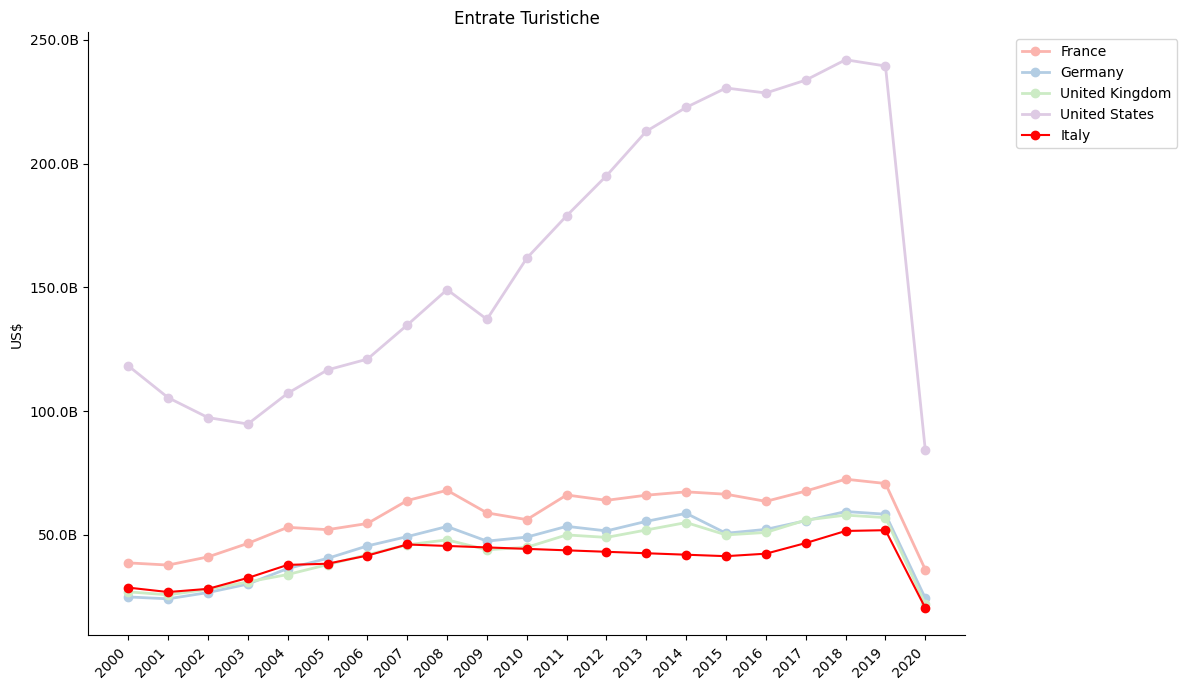

In [5]:
# Funzione per convertire il colore RGB (0-255) in formato esadecimale
def rgb_to_hex(r, g, b):
    return f"#{r:02x}{g:02x}{b:02x}"

# Carica i dati
file_path = "datasets/Receipts.csv"
df = pd.read_csv(file_path)

# Seleziona i paesi di interesse
countries = ["Italy", "France", "Germany", "United Kingdom", "United States"]
df_filtered = df[df["Country Name"].isin(countries)]

# Estrai i nomi delle colonne che rappresentano gli anni
years = [col for col in df.columns if col.startswith("20")]

# Filtra i dati per escludere gli anni dal 2021 in poi
years = [year for year in years if int(year[:4]) <= 2020]

# Interpolazione dei valori mancanti
df_filtered[years] = df_filtered[years].replace("..", None).astype(float).interpolate(axis=1)

# Trasforma il dataset in formato lungo
df_long = df_filtered.melt(id_vars=["Country Name"], 
                           value_vars=years, 
                           var_name="Year", value_name="Receipts")

# Converte l'anno in formato numerico
df_long["Year"] = df_long["Year"].str[:4].astype(int)

# Crea una palette pastello per gli altri paesi
colors_pastel = sns.color_palette("Pastel1", len(countries) - 1)

# Crea un dizionario per i colori dei paesi
color_dict = {country: rgb_to_hex(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
              for country, color in zip(countries[1:], colors_pastel)}

# Colore molto saturo per l'Italia
color_dict["Italy"] = rgb_to_hex(255, 0, 0)  # Rosso molto saturo per l'Italia

# Crea il grafico con Matplotlib
plt.figure(figsize=(12, 7))  # Dimensioni aumentate per evitare sovrapposizioni

# Disegna prima i grafici degli altri paesi
for country in countries:
    if country != "Italy":
        country_data = df_long[df_long["Country Name"] == country]
        plt.plot(country_data["Year"], country_data["Receipts"], label=country, 
                 color=color_dict.get(country, "#1f77b4"), marker='o', markersize=6, linewidth=2)

# Disegna il grafico dell'Italia sopra gli altri
italy_data = df_long[df_long["Country Name"] == "Italy"]
plt.plot(italy_data["Year"], italy_data["Receipts"], label="Italy", 
         color=color_dict["Italy"], marker='o', zorder=10)

# Personalizza il grafico
plt.title("Entrate Turistiche")
plt.ylabel("US$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rimuovi griglia e bordi superiore e destro
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Formatta l'asse Y per mostrare i numeri in miliardi
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B'))

# Mostra ogni anno sull'asse X e ruota leggermente le etichette
plt.xticks(range(2000, 2021, 1), rotation=45, ha='right')

# Layout compatto per evitare sovrapposizioni
plt.tight_layout()

# Mostra il grafico
plt.show()

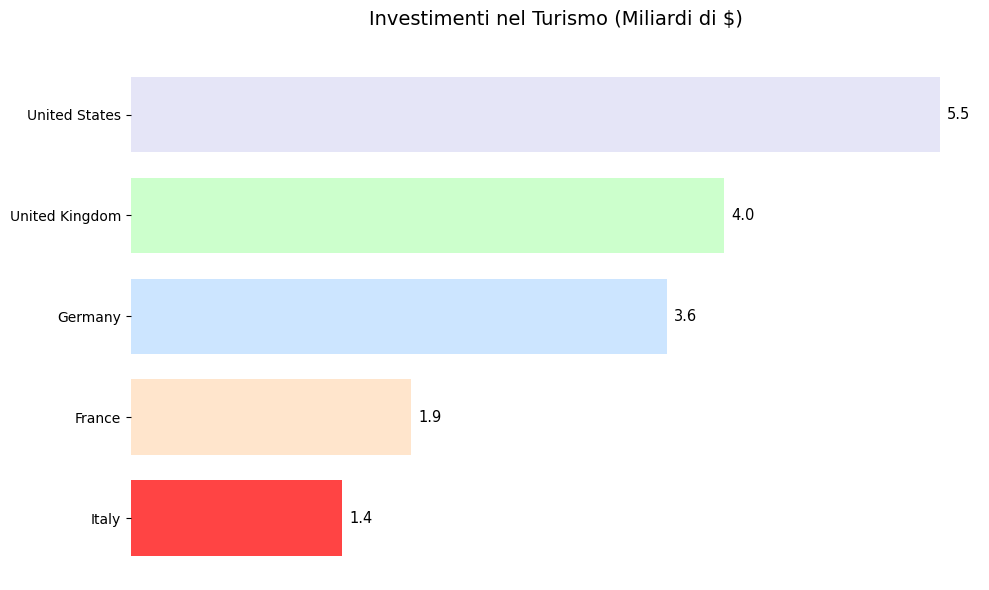

In [6]:
# Caricamento dei dati dal file CSV
file_path = "datasets/investments.csv"  # Percorso del file
df = pd.read_csv(file_path)

# Filtrare i paesi desiderati
countries_to_show = ['United States', 'United Kingdom', 'Germany', 'France', 'Italy']
df = df[df['Country'].isin(countries_to_show)]

# Ordinamento dei dati per investimenti in modo decrescente
df = df.sort_values(by='Estimated_Investment_bn', ascending=True)

# Colori pastello
pastel_colors = ['#ff4444', '#ffe5cc', '#cce5ff', '#ccffcc', '#e5e5f7']

# Creazione del grafico a barre orizzontali
plt.figure(figsize=(10, 6))
bar_height = 0.75  # Altezza delle barre (più basso = barre più strette)
bars = plt.barh(
    df['Country'], 
    df['Estimated_Investment_bn'], 
    color=pastel_colors[:len(df)],
    height=bar_height  # Imposta altezza barre
)

# Aggiunta dei valori sulle barre
for bar, value in zip(bars, df['Estimated_Investment_bn']):
    plt.text(
        bar.get_width() + 0.05,  # Posizione del testo
        bar.get_y() + bar.get_height() / 2,  # Altezza del testo
        f"{value:.1f}",  # Testo con formato
        va='center', 
        fontsize=10.5
    )

# Personalizzazione del grafico
plt.title("Investimenti nel Turismo (Miliardi di $)", fontsize=14, pad=20)
plt.gca().xaxis.set_visible(False)  # Rimuove l'asse orizzontale
plt.gca().spines['left'].set_visible(False)  # Nasconde il bordo dell'asse y
plt.gca().spines['bottom'].set_visible(False)  # Nasconde il bordo dell'asse x
plt.gca().spines['right'].set_visible(False)  # Nasconde il bordo destro
plt.gca().spines['top'].set_visible(False)  # Nasconde il bordo superiore

# Rimuove i titoli degli assi
plt.xlabel("")
plt.ylabel("")

# Sfondo bianco
plt.gca().set_facecolor('white')

# Mostra il grafico
plt.tight_layout()
plt.show()

In [7]:
try:
    # Lettura e pulizia del dataset
    data = pd.read_csv('datasets/arrivi.csv', sep=';', encoding='utf-8')
    data.columns = data.columns.str.strip()
    data['Visitatori'] = pd.to_numeric(data['Valori'], errors='coerce').dropna()  # Cambiato "Valori" in "Visitatori"
    data['Regioni di residenza'] = data['Regioni di residenza'].replace({'TRENTO': 'TRENTINO ALTO ADIGE', 'BOLZANO': 'TRENTINO ALTO ADIGE'})

    # Raggruppamento dati
    dati_aggregati = data.groupby(['Regioni di residenza', 'mese'])['Visitatori'].sum().reset_index()  # Cambiato "Valori" in "Visitatori"
    dati_totali_per_regione = dati_aggregati.groupby('Regioni di residenza')['Visitatori'].sum().reset_index()  # Cambiato "Valori" in "Visitatori"

    # Definire una palette di colori pastello
    color_palette = pc.qualitative.Plotly_r  

    # Creazione del primo grafico (linea)
    fig1 = px.line(dati_aggregati, x='mese', y='Visitatori', color='Regioni di residenza',
                   title='Andamento mensile per regione', markers=True, color_discrete_sequence=color_palette)
    fig1.update_traces(mode='lines+markers').update_layout(
        xaxis_tickangle=-45,
        xaxis_title='Mese',
        yaxis_title='Visitatori',
        showlegend=True,
        xaxis=dict(showgrid=False),  # Rimuovere le griglie
        yaxis=dict(showgrid=False),  # Rimuovere le griglie
        plot_bgcolor='white',        # Sfondo bianco del grafico
        paper_bgcolor='white'       # Sfondo bianco esterno
    )
    fig1.show()

    # Creazione del secondo grafico (pie chart)
    fig2 = px.pie(dati_totali_per_regione, names='Regioni di residenza', values='Visitatori', 
                  title='Distribuzione totale per regione', color='Regioni di residenza', 
                  color_discrete_sequence=color_palette)
    fig2.update_layout(
        plot_bgcolor='white',        # Sfondo bianco del grafico
        paper_bgcolor='white'       # Sfondo bianco esterno
    )
    fig2.show()

    # Creazione del terzo grafico (bar chart)
    fig3 = px.bar(dati_totali_per_regione, x='Visitatori', y='Regioni di residenza', orientation='h',
                  title='Visitatori totali per regione', color='Regioni di residenza', 
                  color_discrete_sequence=color_palette)
    fig3.update_layout(
        yaxis=dict(categoryorder='total ascending', showgrid=False),
        xaxis_title='Visitatori',
        yaxis_title='Regioni di residenza',
        showlegend=True,
        xaxis=dict(showgrid=False),  # Rimuovere le griglie
        plot_bgcolor='white',        # Sfondo bianco del grafico
        paper_bgcolor='white'       # Sfondo bianco esterno
    )
    fig3.show()

except Exception as e:
    print(f"Errore: {e}")